# Phase Correlation

## In this notebook I will show how to use Fourier Transform to find the shifts between two misaligned images, then I will show how to use Bi-linear interpolation to align them.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyfits


### Let's load a continuum image taken from the MURAM simulation of a plage region.

In [3]:
path = '/home/fatima/Desktop/solar_orbiter_project/codes/targets/distortion/'
sim = pyfits.getdata(path+'synth_continuum_profile.fits')

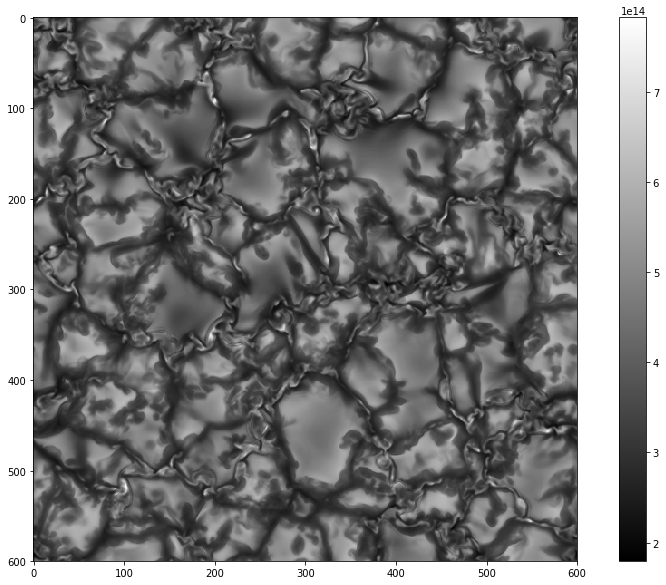

In [8]:
fig = plt.figure(figsize=(15,10))
plt.imshow(sim,cmap='gray')
plt.colorbar()

### Let us introduce vertical and horizontal shifts.

In [42]:
def shift(x,y,del_x,del_y):
     x_s = x + del_x
     y_s = y + del_y
     return x_s, y_s

In [5]:
from scipy import interpolate

In [12]:
size = sim.shape[0]
x = y = np.arange(size)

F= interpolate.interp2d(x,y,sim, kind='linear')


In [15]:
shifted = np.zeros((size,size))
for j in range(size):
    for i in range(size):
      i_s, j_s = shift(i,j,10,3)
      shifted[j,i] = F(i_s,j_s) 


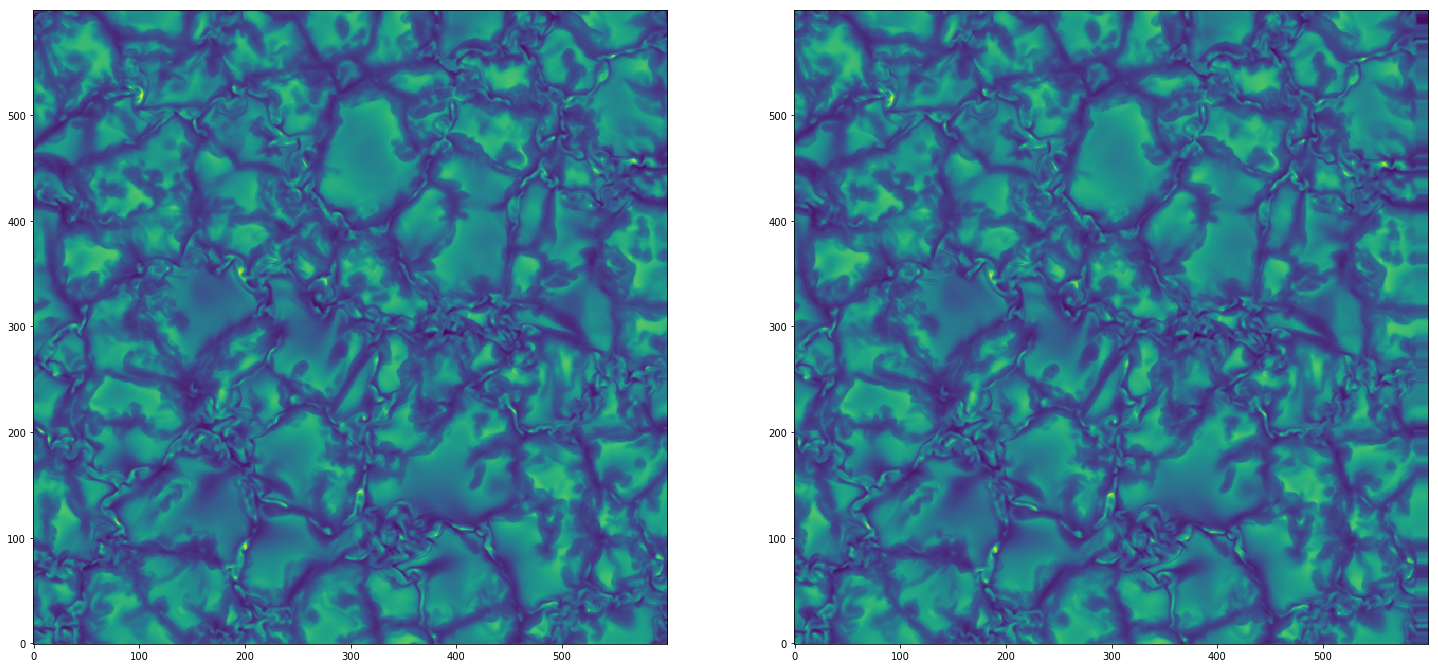

In [16]:
fig=plt.figure(figsize=(25,15))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(sim,origin='lower')
ax2.imshow(shifted,origin='lower')

### So I have introduced a shift by 3 and 10 pixels vertically and horizontally, respectively. So the algorithm I am going to run on the shifted image now should return a shift of -3 and -10 pixels with respect to the original simulation.

In [22]:
from scipy.fftpack import fftshift, ifftshift, fft2, ifft2


In [30]:
shifted = shifted.astype(float)
sim = sim.astype(float)
F = fft2(sim)
D = fft2(shifted)

In [31]:
from numpy import multiply


In [32]:
R = (np.multiply(F, np.conj(D)))

In [33]:
r = fftshift(ifft2(R))

In [34]:
yShift, xShift = np.unravel_index( np.argmax(r), (size,size) )


In [35]:
yShift -= int(size/2)
xShift -= int(size/2)

In [39]:
print yShift, xShift


3 10


In [40]:
size = sim.shape[0]
x = y = np.arange(size)

F= interpolate.interp2d(x,y,shifted, kind='linear')


In [43]:
shifted_back = np.zeros((size,size))
for j in range(size):
    for i in range(size):
      i_s, j_s = shift(i,j,-xShift,-yShift)
      shifted_back[j,i] = F(i_s,j_s) 


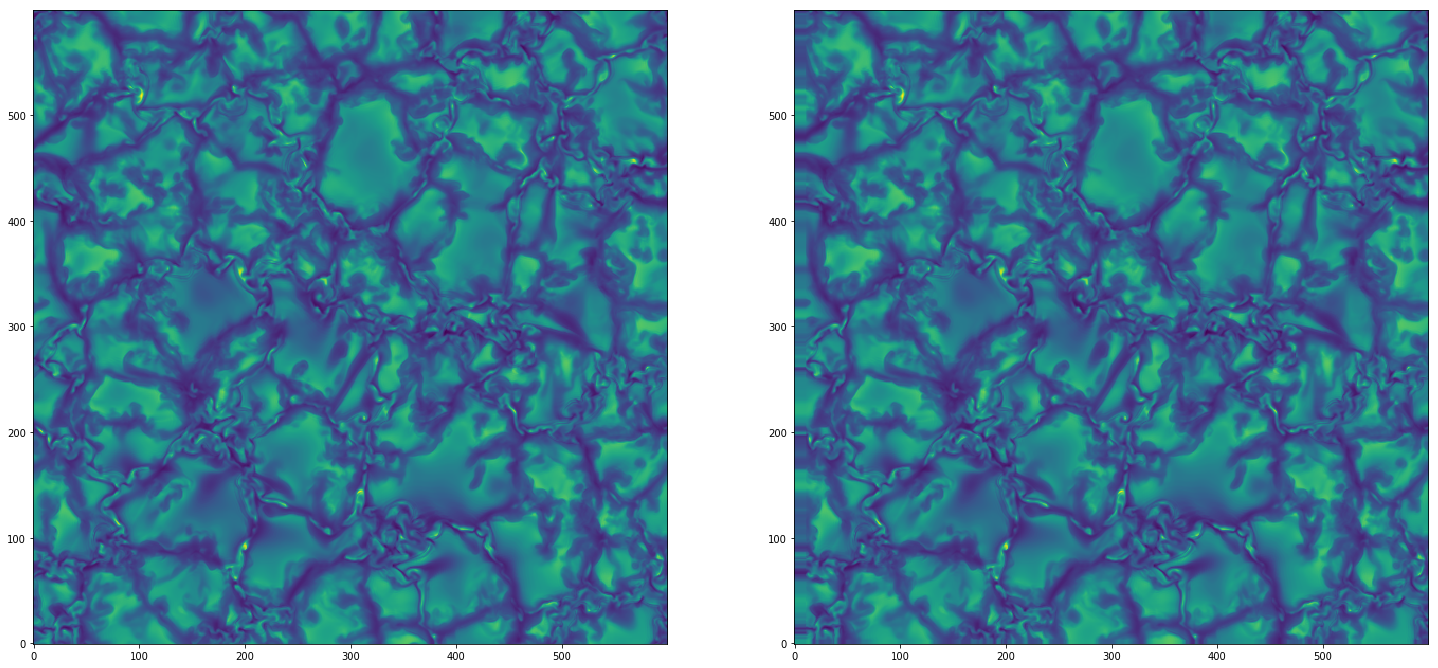

In [48]:
fig=plt.figure(figsize=(25,15))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(sim,origin='lower')
ax2.imshow(shifted_back ,origin='lower')